In [1]:
# Importing required modules

import random
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Variable Declarations

FN_Count = 7
BS_Count=6
IOT_count=10
arduino_frequency= np.array([random.randrange(14000000,16000000,1) for x in range(IOT_count)]) #Mhz
FN_array=np.array([i for i in range(FN_Count)])
channel_frequency=10000000 #Mhz bandwidth
distance=2000 #km
task_input=random.randrange(300,600) *1000 #kb
task_output=random.randrange(10,20) * 1000 #kb
compu_demand=random.randrange(210,480) *1000000 # million cycles
noise_power= math.pow(10,-10) #w
IOT_TP= np.array([random.random() for x in range(IOT_count)]) #w
FN_TP=np.array([random.random()*2 for x in range(FN_Count)]) #w
FN_compu_power=np.array([random.randrange(350,550) * math.pow(10,-3) for x in range(FN_Count)])#w
task_deadline= random.randrange(30,60) #s
FN_quota=np.array([random.randrange(50,500) for x in range(FN_Count)])
avg_arrival_rate=0.5 #flows/sec
avg_traffic_size=0.005 *math.pow(10,6) #Mbits
data_compu_size=5000 #CPU cycles
BS_traffic_threshold=0.99
FN_compu_threshold=0.99
FN_compu_rate=np.array([random.randrange(6000,10000)*math.pow(10,6) for x in range(FN_Count)]) #ghz
SOL=3*10**8 #m/s

In [4]:

# Function to find the nearest node
def distance(A,B):
    dist=math.sqrt(math.pow((A[0]-B[0]),2)+math.pow((A[1]-B[1]),2))
    return dist
    
def nearest_find(Locations,X,Y,Count):
    dist=np.arange(Count)
    node_num=np.arange(1,Count+1)
    for i in range(Count):
        dist[i]=math.sqrt(math.pow((Locations[i][0]-X),2)+math.pow((Locations[i][1]-Y),2))
        node_num[i]=i+1
    
    node_pair=list(zip(dist,node_num))
    node_pair.sort()
    filtered=[ x[1] for x in node_pair ]
    return filtered

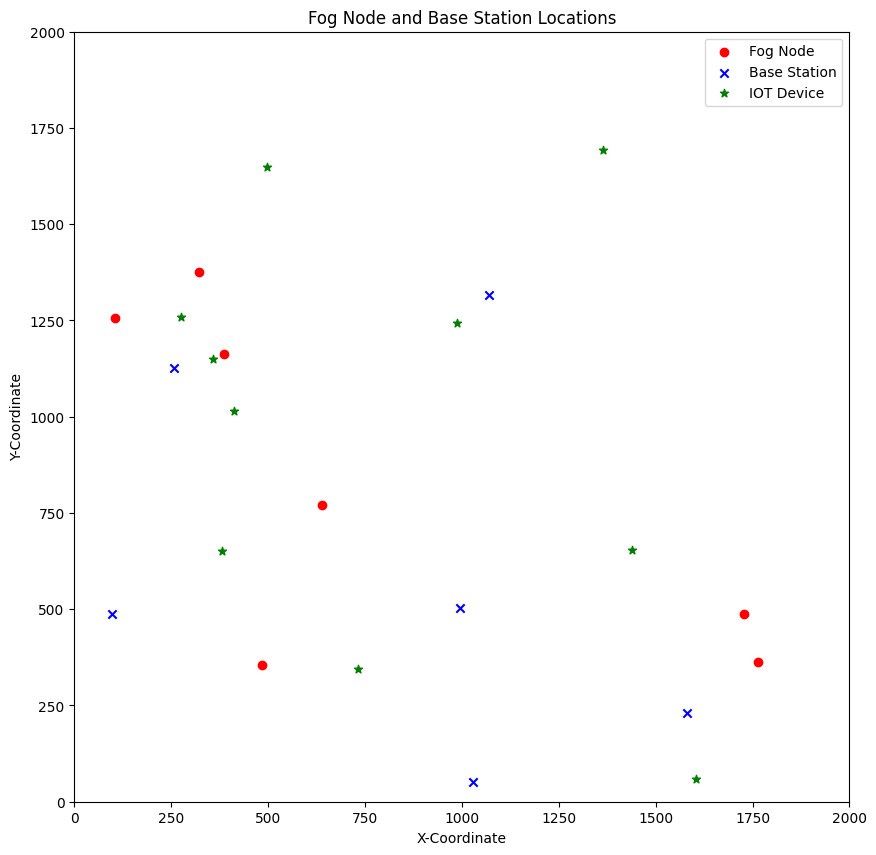

In [5]:

# Nodes and base station location initialization
FN_Locations=np.zeros((FN_Count,2))
BS_Locations=np.zeros((BS_Count,2))
IOT_Locations=np.zeros((IOT_count,2))
for i in range(FN_Count):
    FN_Locations[i][0]=random.randrange(20,1800)
    FN_Locations[i][1]=random.randrange(20,1800)

for i in range(BS_Count):
    BS_Locations[i][0]=random.randrange(20,1800)
    BS_Locations[i][1]=random.randrange(20,1800)

for i in range(IOT_count):
    IOT_Locations[i][0]=random.randrange(20,1800)
    IOT_Locations[i][1]=random.randrange(20,1800)

plt.figure(figsize=(10, 10))
plt.scatter(FN_Locations[:,0],FN_Locations[:,1],color='red',marker='o',label='Fog Node')
plt.scatter(BS_Locations[:,0],BS_Locations[:,1],color='blue',marker='x',label='Base Station')
plt.scatter(IOT_Locations[:,0],IOT_Locations[:,1],color='green',marker='*',label='IOT Device')
plt.legend()
plt.title('Fog Node and Base Station Locations')
plt.xlabel('X-Coordinate')
plt.ylabel('Y-Coordinate')
plt.xlim(0, 2000)
plt.ylim(0, 2000)
plt.show()

In [6]:
#finding the nearest fog node for each base station
print("Nearest Fog node for each Base station:",end='\n\n')
BS_nearest_FN=np.zeros((BS_Count,FN_Count),dtype=int)
for i in range(BS_Count):
    BS_nearest_FN[i]=nearest_find(FN_Locations,BS_Locations[i][0],BS_Locations[i][1],FN_Count)
    print(f'for Base station {i+1}:{BS_nearest_FN[i]}',end='\n')

print('\n')

#finding the nearest base station for each iot device
print("Nearest Base station for each Fog node:",end='\n\n')
IOT_nearest_BS=np.zeros((IOT_count,BS_Count),dtype=int)
for i in range(IOT_count):
    IOT_nearest_BS[i]=nearest_find(BS_Locations,IOT_Locations[i][0],IOT_Locations[i][1],BS_Count)
    print(f'for IOT device {i+1}:{IOT_nearest_BS[i]}',end='\n')

print('\n')

Nearest Fog node for each Base station:

for Base station 1:[3 5 6 7 1 2 4]
for Base station 2:[4 2 7 1 3 6 5]
for Base station 3:[1 7 3 5 6 2 4]
for Base station 4:[7 3 6 5 2 1 4]
for Base station 5:[1 4 7 2 3 6 5]
for Base station 6:[7 1 2 4 3 6 5]


Nearest Base station for each Fog node:

for IOT device 1:[6 5 3 2 1 4]
for IOT device 2:[3 1 6 5 4 2]
for IOT device 3:[1 4 3 6 5 2]
for IOT device 4:[4 1 6 2 5 3]
for IOT device 5:[1 3 4 6 5 2]
for IOT device 6:[4 1 6 3 2 5]
for IOT device 7:[2 5 6 4 3 1]
for IOT device 8:[1 3 4 6 5 2]
for IOT device 9:[1 3 4 6 5 2]
for IOT device 10:[2 6 5 4 1 3]




In [7]:
#printing dataframe for fog nodes data
data={'Fog Node':range(1,FN_Count+1),'X':FN_Locations[:,0],'Y':FN_Locations[:,1],'Computing Power':FN_compu_power,'Transmission Power':FN_TP,'Quota':FN_quota,'Threshold':FN_compu_threshold,'Computing Rate':FN_compu_rate}
dataset=pd.DataFrame(data)
print(dataset,end='\n')

print('\n')

#printing dataframe for IOT device
data={'IOT Device':range(1,IOT_count+1),'X':IOT_Locations[:,0],'Y':IOT_Locations[:,1],'Arduino Frequency':arduino_frequency,'Transmission Power':IOT_TP}
dataset=pd.DataFrame(data)
print(dataset,end='\n')

print('\n')

   Fog Node       X       Y  Computing Power  Transmission Power  Quota  \
0         1   485.0   354.0            0.541            1.561262    106   
1         2  1727.0   488.0            0.536            1.686493    352   
2         3   385.0  1163.0            0.413            1.623963    466   
3         4  1765.0   363.0            0.371            1.817829    403   
4         5   104.0  1256.0            0.481            1.479889    313   
5         6   321.0  1376.0            0.491            0.077212    234   
6         7   639.0   771.0            0.355            1.318541    186   

   Threshold  Computing Rate  
0       0.99    9.896000e+09  
1       0.99    6.115000e+09  
2       0.99    8.327000e+09  
3       0.99    9.653000e+09  
4       0.99    7.130000e+09  
5       0.99    7.831000e+09  
6       0.99    6.785000e+09  


   IOT Device       X       Y  Arduino Frequency  Transmission Power
0           1   732.0   346.0           15713141            0.965907
1          

Local Time execution time = [21.82886286 22.26020663 21.75111988 22.21200916 22.63052319 23.4590836
 22.54256322 21.99701187 22.42313115 23.6291266 ]sec


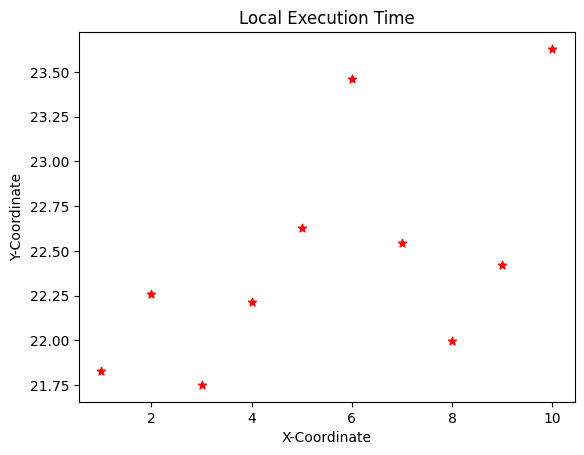

In [8]:

# Local execution time 
local_time=compu_demand/arduino_frequency
print(f'Local Time execution time = {local_time}sec')
plt.scatter(np.array([i for i in range(1,IOT_count+1)]),local_time,marker='*',color="red")#second graph
plt.title("Local Execution Time")
plt.xlabel('X-Coordinate')
plt.ylabel('Y-Coordinate')
plt.show()

In [9]:
# Traffic Load Model
    
#IOT device uplink data rate and transmission time
SNR=IOT_TP*1/noise_power
uplink_data_rate=channel_frequency*(np.array([math.log(1+SNR[i],2) for i in range(IOT_count)])) #math.log(1+SNR,2)
print(f'uplink data link of each IOT towards BS j= {uplink_data_rate} Mhz',end='\n')

uplink_transmmision_time=task_output/uplink_data_rate
print(f'uplink transmission time for each IOT associated to BS j={uplink_transmmision_time *1000} milliseconds',end='\n') #millisecond

# average traffic load Density of IOT device
avg_TL_Density=avg_arrival_rate*task_output*1/uplink_data_rate
print(f'average traffic load density of each IOT at BS j= {avg_TL_Density *1000} milliseconds',end='\n') #millisecond

avg_traffic_load=0
for i in range(IOT_count):
    avg_traffic_load+=avg_TL_Density[i]

avg_traffic_load=avg_traffic_load/IOT_count
print(f'avg Traffic Load for the BS j= {avg_traffic_load *1000} milliseconds',end='\n') #millisecond

avg_service_time=uplink_transmmision_time
print(f'average Service Time = {avg_service_time*1000} milliseconds',end='\n')

avg_del_time=avg_service_time/(1-avg_traffic_load)
print(f'average delivery time = {avg_del_time*1000} milliseconds',end='\n')

avg_waiting_time=avg_del_time*avg_traffic_load # WT=DL-ST
print(f'average waiting time = {avg_waiting_time*1000000} microseconds',end='\n')


communication_LR=avg_traffic_load/(1-avg_traffic_load)
print(f'communication latency ratio of BS j = {communication_LR*1000} * 10^-3',end='\n\n\n')

uplink data link of each IOT towards BS j= [3.31692371e+08 3.29249226e+08 3.15391271e+08 3.31408273e+08
 3.07700538e+08 2.97052118e+08 3.24516017e+08 3.10468043e+08
 3.22201305e+08 3.23683246e+08] Mhz
uplink transmission time for each IOT associated to BS j=[0.03014842 0.03037213 0.03170665 0.03017426 0.03249913 0.03366413
 0.03081512 0.03220943 0.0310365  0.0308944 ] milliseconds
average traffic load density of each IOT at BS j= [0.01507421 0.01518606 0.01585332 0.01508713 0.01624957 0.01683206
 0.01540756 0.01610472 0.01551825 0.0154472 ] milliseconds
avg Traffic Load for the BS j= 0.01567600826980555 milliseconds
average Service Time = [0.03014842 0.03037213 0.03170665 0.03017426 0.03249913 0.03366413
 0.03081512 0.03220943 0.0310365  0.0308944 ] milliseconds
average delivery time = [0.03014889 0.03037261 0.03170714 0.03017473 0.03249964 0.03366465
 0.0308156  0.03220994 0.03103698 0.03089489] milliseconds
average waiting time = [0.00047261 0.00047612 0.00049704 0.00047302 0.0005094

In [10]:

# Computing load model
FN_computing_capacity=FN_compu_rate/FN_quota
print(f'FN computing capacity={FN_computing_capacity*1000} * 10^-3 cycles/sec',end='\n')

FN_avg_service_time=data_compu_size/FN_computing_capacity
print(f'average service time at FN through location x= {FN_avg_service_time*1000} milliseconds',end='\n')

FN_avg_compu_LD=FN_avg_service_time*avg_arrival_rate*1
print(f'average computing load density at FN  through location x= {FN_avg_compu_LD *1000} milliseconds',end='\n')

FN_aggregate_CL=0
for i in range(FN_Count):
    FN_aggregate_CL+=FN_avg_compu_LD[i]
print(f'Computing load at FN j = {FN_aggregate_CL} milliseconds',end='\n')

FN_avg_WT=FN_aggregate_CL*FN_avg_service_time/(1-FN_aggregate_CL)
print(f'average waiting time for fog node j = {FN_avg_WT*1000000} microseconds',end='\n')

FN_CLR=FN_aggregate_CL/(1-FN_aggregate_CL)
print(f'Computing latency ratio of fog node j = {FN_CLR}',end='\n\n')

avg_LR=FN_CLR+communication_LR
print(f'average latency of processing data flows via the pair of BS j and fog node j = {avg_LR}',end='\n')


FN computing capacity=[9.33584906e+10 1.73721591e+10 1.78690987e+10 2.39528536e+10
 2.27795527e+10 3.34658120e+10 3.64784946e+10] * 10^-3 cycles/sec
average service time at FN through location x= [0.05355699 0.28781684 0.27981266 0.2087434  0.21949509 0.14940621
 0.13706706] milliseconds
average computing load density at FN  through location x= [0.0267785  0.14390842 0.13990633 0.1043717  0.10974755 0.0747031
 0.06853353] milliseconds
Computing load at FN j = 0.0006679491234824033 milliseconds
average waiting time for fog node j = [0.03579726 0.19237551 0.18702554 0.13952316 0.14670955 0.09986245
 0.09161502] microseconds
Computing latency ratio of fog node j = 0.0006683955777226826

average latency of processing data flows via the pair of BS j and fog node j = 0.0006840718317335757


In [11]:
# For each IOT device
total_time_arr=[]
for i in range(IOT_count):
    best_BS=IOT_nearest_BS[i][0]
    best_FN=BS_nearest_FN[best_BS-1][0]
    best_BS_coor=BS_Locations[best_BS-1]
    best_FN_coor=FN_Locations[best_FN-1]
    IOT_coor=IOT_Locations[i]
    IOT_latency_time=avg_del_time[best_BS] + FN_avg_WT[best_BS]*1000
    total_time= (IOT_latency_time + FN_avg_service_time[best_BS]+distance(IOT_coor,best_BS_coor)/SOL + distance(best_BS_coor,best_FN_coor)/SOL +avg_LR)*1000
    print(f'For IOT device {i+1}: {total_time} seconds',end='\n')
    total_time_arr.append(total_time)
total_time_arr=np.array(total_time_arr)

For IOT device 1: 0.9460810744985971 seconds
For IOT device 2: 1.0649789677891777 seconds
For IOT device 3: 1.196995286490531 seconds
For IOT device 4: 1.0866884459329849 seconds
For IOT device 5: 1.1957226087129549 seconds
For IOT device 6: 1.0854490778706878 seconds
For IOT device 7: 1.1839527248099904 seconds
For IOT device 8: 1.195528238487729 seconds
For IOT device 9: 1.1954317532638699 seconds
For IOT device 10: 1.1848639933540435 seconds


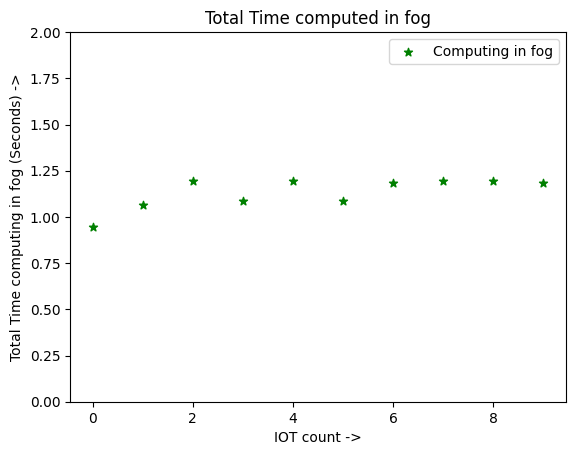

In [12]:
# Plotting graph for total time
plt.scatter(np.array([i for i in range(IOT_count)]),total_time_arr,marker='*',color="green",label="Computing in fog")
plt.legend()
plt.ylim(0,2)
plt.xlabel('IOT count ->')
plt.ylabel('Total Time computing in fog (Seconds) ->')
plt.yticks(np.arange(0,2.25,0.25))
plt.title("Total Time computed in fog")
plt.show()

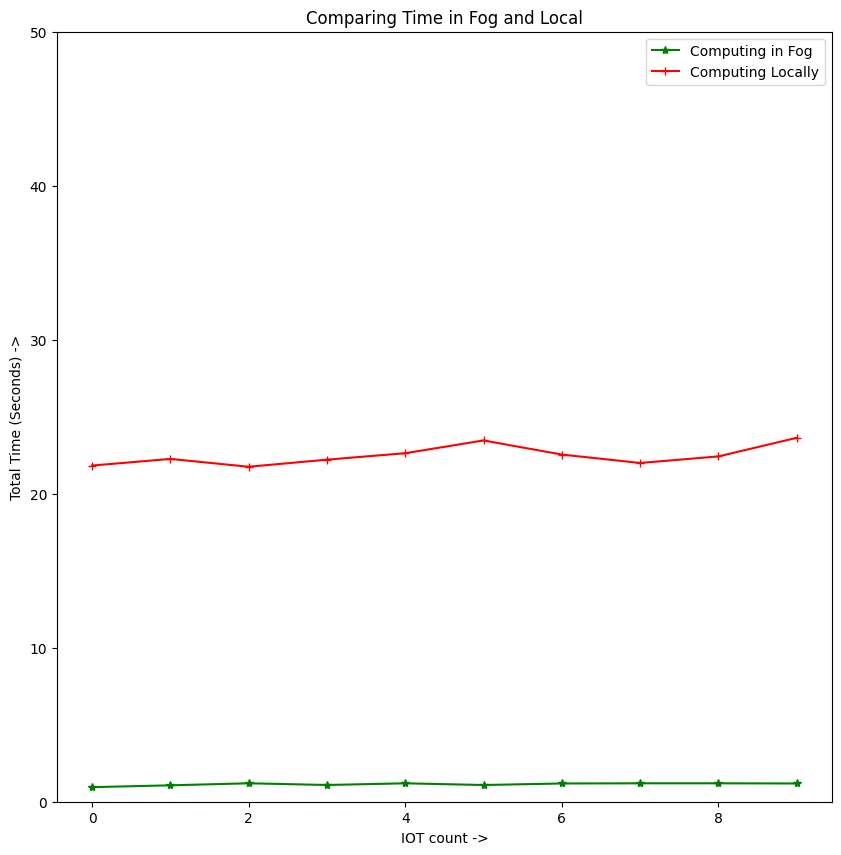

In [13]:
#comparing time in fog and local
plt.figure(figsize=(10, 10))
plt.plot(np.array([i for i in range(IOT_count)]),total_time_arr,marker='*',color="green",label="Computing in Fog")
plt.plot(np.array([i for i in range(IOT_count)]),local_time,marker='+',color="red",label="Computing Locally")
plt.legend()
plt.title('Comparing Time in Fog and Local')
plt.xlabel('IOT count ->')
plt.ylabel('Total Time (Seconds) ->')
plt.ylim(0, 50)
plt.show()

In [14]:
# Values for each IOT
print("For each IOT device values calculated:",end='\n\n')
for i in range(IOT_count):
    print(f"For IOT device {i+1}:")
    print(f"Local Execution Time:{uplink_data_rate[i]} seconds")
    print(f"Uplink Transmission Time:{uplink_transmmision_time[i]} milliseconds")
    print(f"average traffic load density at BS j:{avg_TL_Density[i]} milliseconds")
    print(f"average service time :{avg_service_time[i]} milliseconds")
    print(f"average delivery time:{avg_del_time[i]} milliseconds")
    print(f"average waiting time:{avg_waiting_time[i]} microseconds")
    print('\n')
print('\n')
print(f'avg Traffic Load for the BS j= {avg_traffic_load *1000} milliseconds',end='\n')
print(f'communication latency ratio of BS j = {communication_LR*1000} * 10^-3',end='\n\n\n')

#values for each fog node
print("For each Fog Node Values calculated:",end='\n\n')
for i in range(FN_Count):
    print(f"For Fog Node {i+1}:")
    print(f"Computing capacity:{FN_computing_capacity[i]} * 10^-3 cycles/sec")
    print(f"average service time at FN through location x:{FN_avg_service_time[i]} milliseconds")
    print(f"average computing load density at FN  through location x:{FN_avg_compu_LD[i]} milliseconds")
    print(f"average waiting time for fog node j:{FN_avg_WT[i]} microseconds")
    print('\n')
print('\n')
print(f"Computing latency ratio of fog node j:{FN_CLR}")
print(f'Computing load at FN j = {FN_aggregate_CL} milliseconds',end='\n')
print(f'average latency of processing data flows via the pair of BS j and fog node j = {avg_LR}',end='\n')




For each IOT device values calculated:

For IOT device 1:
Local Execution Time:331692371.1618125 seconds
Uplink Transmission Time:3.0148417236649707e-05 milliseconds
average traffic load density at BS j:1.5074208618324853e-05 milliseconds
average service time :3.0148417236649707e-05 milliseconds
average delivery time:3.0148889850896334e-05 milliseconds
average waiting time:4.726142466281076e-10 microseconds


For IOT device 2:
Local Execution Time:329249226.4340753 seconds
Uplink Transmission Time:3.0372129065585744e-05 milliseconds
average traffic load density at BS j:1.5186064532792872e-05 milliseconds
average service time :3.0372129065585744e-05 milliseconds
average delivery time:3.037260518679583e-05 milliseconds
average waiting time:4.761212100837504e-10 microseconds


For IOT device 3:
Local Execution Time:315391271.3316756 seconds
Uplink Transmission Time:3.1706647929021726e-05 milliseconds
average traffic load density at BS j:1.5853323964510863e-05 milliseconds
average service 